In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np
from cycler import cycler
import re

import glob

%matplotlib inline

In [2]:
#Import style
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Futura Std',
    'font.style' : 'normal',
    'font.weight' : '100',
    'font.stretch' : 'ultra-condensed',
    
    'figure.facecolor'    : '#FDF6E3',

    
    'patch.antialiased'   : True,

    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',

    'axes.titlesize'      : 16,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f', '#86a3ba']),

    'axes.grid'           : False,
    'grid.color'          : '#ffffff',    # grid color
    'grid.linestyle'      : ':',         # line
    'grid.linewidth'      : 1,        # in points

    ### TICKS
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,

    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    
})

In [3]:
df = pd.read_csv("who_pays_final.csv")
# df.head()

In [4]:
df[['rate','type']]=df.money.str.extract('\$(\d*.\d*)\\n/*(\w*)')
# df.head()

In [5]:
df['rate'] = df.rate.astype(float)
# df.head()

In [6]:
#Drop obvious miscategorizations
df.drop(df.index[[1822,860,583, 2979, 1971, 1696, 1689]], inplace=True)


In [7]:
# drop n/a's (Only from money column)
df = df.dropna(subset=['money'])

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
# df.loc[df.money.str.contains("flat", na=False), "flat_rate"] = df.money.str.extract('\$(\d*.\d*)')
# df.loc[~df.money.str.contains("flat", na=False), "per_word"] = df.money.str.extract('\$(\d*.\d*)')

In [10]:
# Make a seperate DF, df_per, to hold only entries that were paid per word 
df_per = df[df['type'] != 'flat']
df_per.to_csv('df_per.csv', index=False)

In [11]:
df_per = pd.read_csv('df_per.csv')

# Is there a more interesting way to show this than a bar chart?
# If not:
### Drop the dupes and fill.
### X Make all bars the same color
### X drop the legend
### X drop the axis labels (do in rcparam)

# DON'T RUN THIS CELL

In [12]:
# # It would be nice if i could only display companies that have paid these rates at least twice
# # What would that look like in code?
# # if price 1 in list of prices from the company > 1 
# # then add to new list
# # sort new list, take tail 10 

# # This would eliminate the need to de-dupe

# # make a list of all the prices one company pays

# psuedo:
#     dictofpubs{pub1:{price:pricecount}, pub2:{price:pricecount, price:pricecount}}
    
#     go through each line in the df
#     if pub_name isin dictofpubs:
#         if price is in dictofprices:
#             pricecount += 1 
#         else:
#              dictofpubs.append({pub_name:{price:pricecount}})
#     else:
#         dictofpubs.append({pubname:{price:pricecount}})

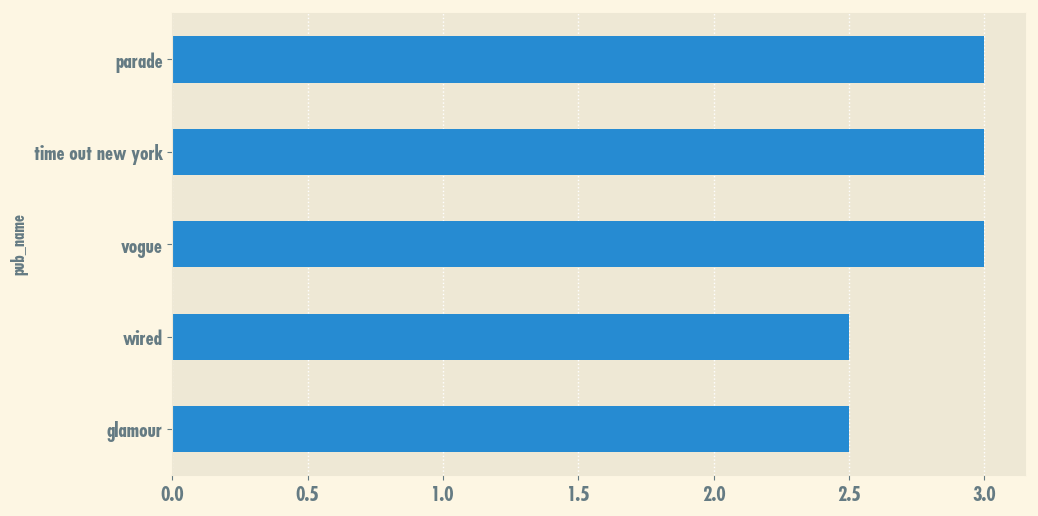

In [13]:
ax_rate = df_per.sort_values(by='rate', ascending=True).tail(5).plot(kind='barh', x='pub_name', y='rate', color='#268BD2', figsize=(11,6))
ax_rate.grid(True, axis='x')
ax_rate.legend_.remove()
# plt.savefig('dist.svg')
plt.show()


In [28]:
df_per[df_per.rate >= 2.00].pub_name.value_counts()

new york times magazine              3
cosmopolitan                         2
aarp bulletin                        2
gq                                   2
marie claire                         2
vogue                                2
new york times  t style magazine     2
time out new york                    2
travel and leisure                   2
playboy                              2
wired                                2
popular science                      2
conde nast traveler                  1
vanity fair                          1
new york magazine                    1
pacific standard                     1
islands magazine                     1
glamour                              1
the washington post  on parenting    1
forbes                               1
parade                               1
domino                               1
mens health                          1
Name: pub_name, dtype: int64

In [18]:
# df_per.rate.sort_values(ascending=False)

In [15]:
#This is an attempt to drop duplicate bars

# df_per.groupby('pub_name', squeeze=True).head(10).plot(kind='barh', x='pub_name', y='rate', color='#268BD2')
# plt.show()



# This is probably almost good
### Set the bin width so it's more clear and reflect real breaks in salary (think \$0.50 and \$1.00 instead of \$1.33)
### change all but the first bar to grey?


In [12]:
df_no0= df_per[df_per.rate != 0]

In [15]:
print(len(df_no0))
print(len(df_per))


2623
2762


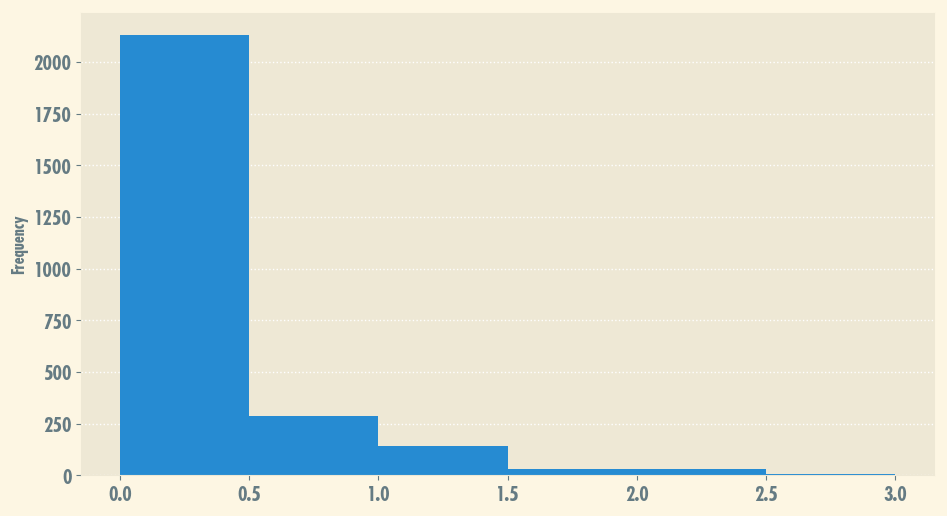

In [43]:
#Full Hist with No zero values

ax_hist = df_no0.rate.plot(kind='hist', bins=6, range=(0,3), figsize=(11,6))
ax_hist.grid(True, axis='y')
# plt.savefig('histno0full.svg')
plt.show()




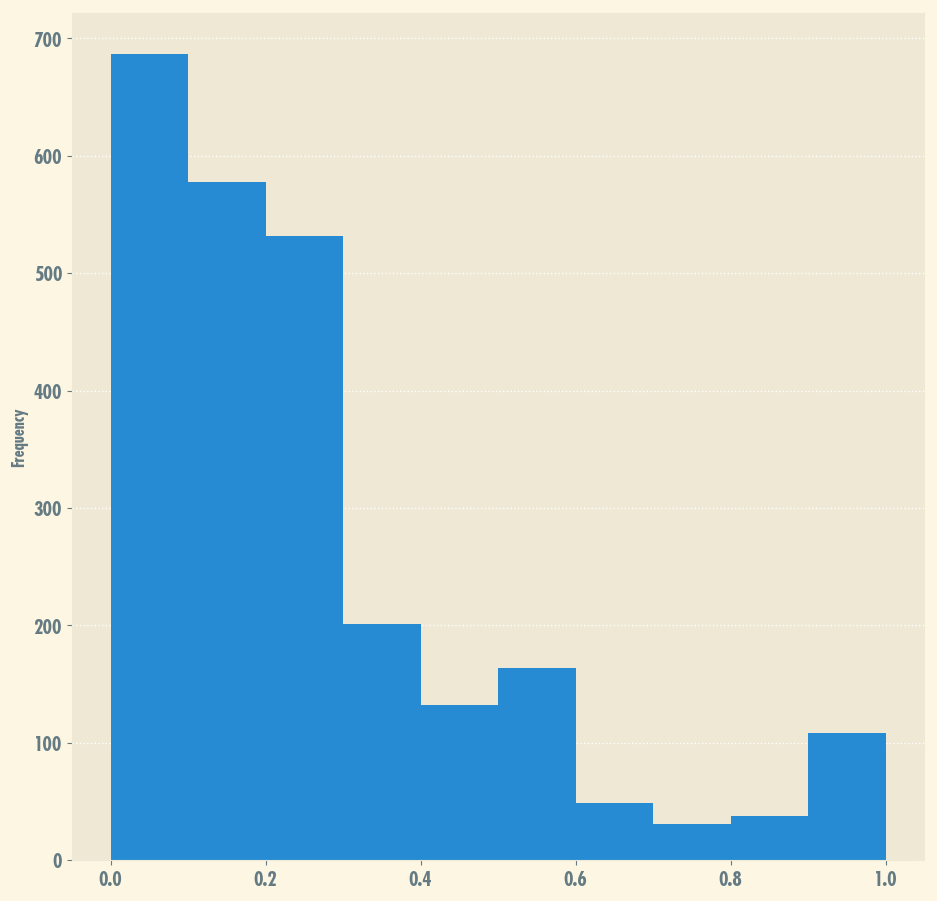

In [36]:
#Hist with No zero values between 0-1, 10 cent bins includes $1

ax_hist = df_no0.rate.plot(kind='hist', bins=10, range=(0,1), figsize=(11,11))
ax_hist.grid(True, axis='y')
# plt.savefig('histno00-1.svg')
plt.show()



In [17]:
df_no0[(df_no0.rate < 0.30) & (df_no0.rate > 0.00)].shape

(1736, 6)

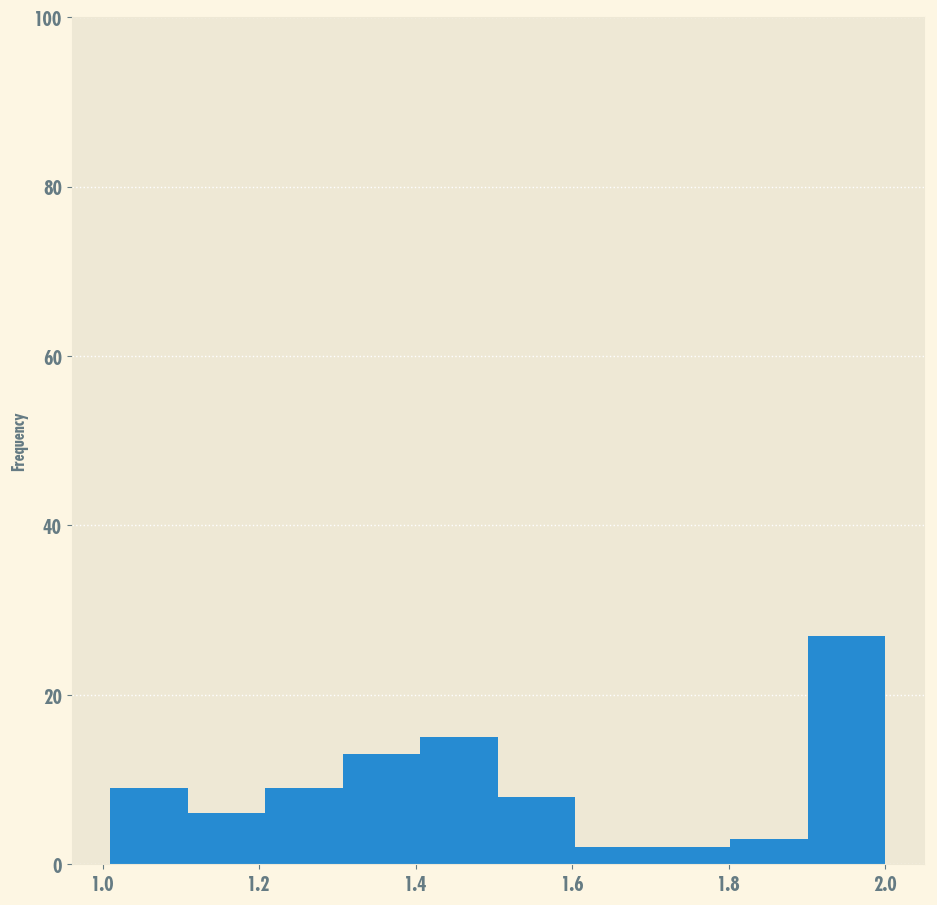

In [32]:
#Hist with No zero values between 1-2, 10 cent bins does not include $1
hist2 = df_no0.rate
ax_hist2 = hist2.plot(kind='hist', bins=10, range=(1.01,2), figsize=(11,11), ylim=(0,100))
ax_hist2.grid(True, axis='y')
plt.savefig('histno01-2.svg')
plt.show()

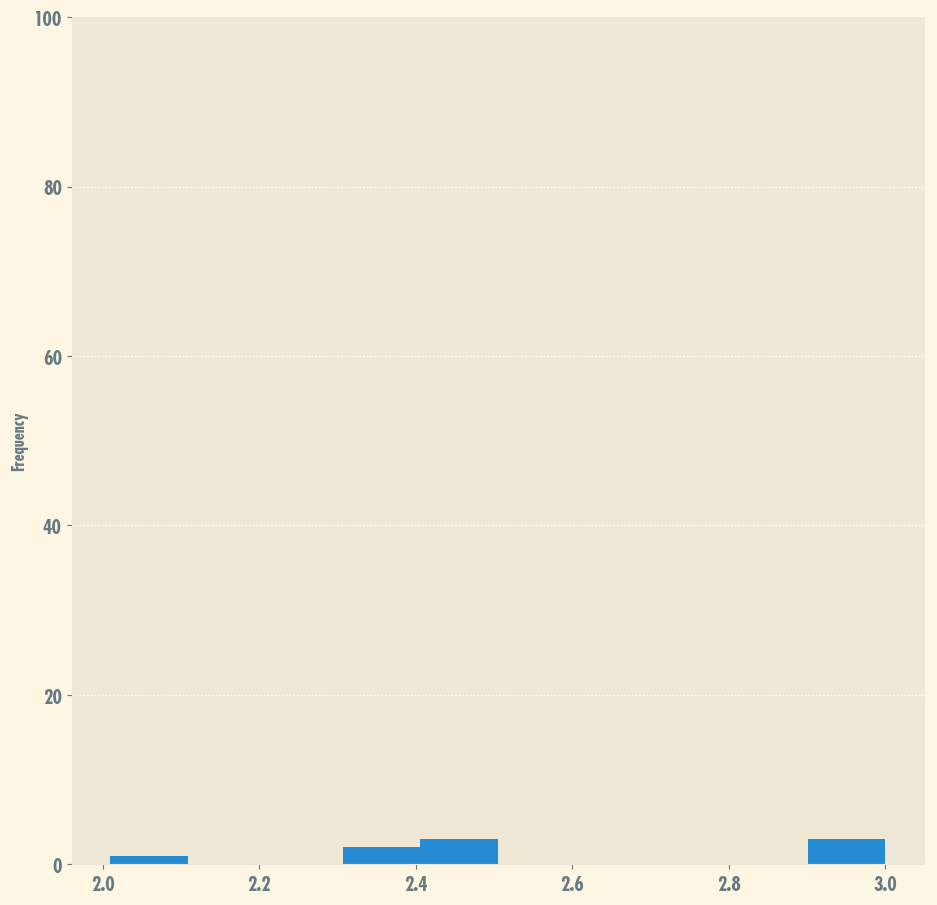

In [30]:
#Hist with No zero values between 2-3, 10 cent bins does not include $1
hist2 = df_no0.rate
ax_hist2 = hist2.plot(kind='hist', bins=10, range=(2.01,3), figsize=(11,11), ylim=(0,100))
ax_hist2.grid(True, axis='y')
# plt.savefig('histno02-3.svg')
plt.show()

In [61]:
#Number of journalists paid 0.50 or less
less50 = len(df_no0[df_no0.rate <= .5])
#number of reports
full = len(df_no0)

less50/full *100

85.24590163934425

In [49]:
df_no0[(df_no0.rate < 2.60) & (df_no0.rate > 2.20)].shape

(5, 6)

In [20]:
# #Full Hist with No zero values

# ax_hist = df_no0.rate.plot(kind='hist', bins=1, range=(0,.50), figsize=(11,6))
# ax_hist.grid(True, axis='y')
# plt.show()





In [ ]:
df_flat = df[df.type == 'flat']

In [ ]:
df_flat.sort_values(by='rate',ascending=False).head(20)

In [19]:
df[df.pub_name == 'Thrillist']

,description,details,money,pub_name,rate,type


,description,details,money,pub_name,rate,type
